In [2]:
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import scipy.special as sci

In [5]:
a= np.arange(6).reshape(3,2)

In [6]:
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
a[1,1]=0

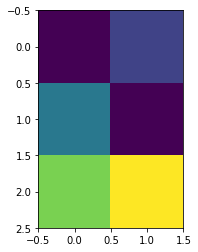

In [9]:
plot.imshow(a, interpolation="nearest")

In [10]:
class Dog:
    def bark(self):
        print("Wang, wang")

In [12]:
d= Dog()
d.bark()

Wang, wang


In [69]:
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        self.wih= np.random.rand(self.hnodes,self.inodes)-0.5
        self.who= np.random.rand(self.onodes, self.hnodes)-0.5
        
        #这个lambda的意思：这里复制一个function，input是x，output是sci.expit(x)，而所谓的expit(x)其实就是sigmoid function
        self.activation_function= lambda x: sci.expit(x)
        pass
    
    def train(self,inputs_list, targets_list):
        inputs= np.array(inputs_list, ndmin=2).T
        targets= np.array(targets_list,ndmin=2).T
        hidden_inputs= np.dot(self.wih, inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        final_inputs= np.dot(self.who, hidden_outputs)
        final_outputs= self.activation_function(final_inputs)
        output_errors= targets- final_outputs
        hidden_errors= np.dot(self.who.T, output_errors)
        self.who += self.lr*np.dot(output_errors*final_outputs*(1-final_outputs), np.transpose(hidden_outputs))
        self.wih += self.lr*np.dot(hidden_errors*hidden_outputs*(1-hidden_outputs), np.transpose(inputs)) 
        pass
    
    #ndimin:Specifies the minimum number of dimensions that the resulting array should have. 
    #Ones will be pre-pended to the shape as needed to meet this requirement.
    def query(self,inputs_list):
        inputs= np.array(inputs_list, ndmin=2).T
        
        hidden_inputs= np.dot(self.wih,inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        
        final_inputs= np.dot(self.who, hidden_outputs)
        final_outputs= self.activation_function(final_inputs)
        
        return final_outputs
    
        
    

In [14]:
n=neuralNetwork(3,3,3,0.3)

In [15]:
n.query([1,0.5,1.5])

array([[ 0.51972637],
       [ 0.46138581],
       [ 0.57852075]])

In [19]:
with open("mnist_train_100.csv") as f:
    data_list= f.readlines()

In [49]:
all_values= data_list[0].split(',')
print(len(all_values))
print(28**2)
## asfarray: convert string to numbers, and copy an array of the numbers
img_array= np.asfarray(all_values[1:]).reshape((28,28))
print(img_array.shape)

785
784
(28, 28)


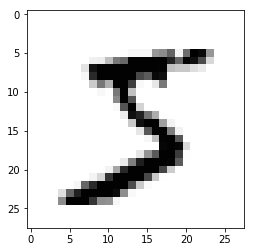

In [51]:
plot.imshow(img_array, cmap='Greys')

(28, 28)


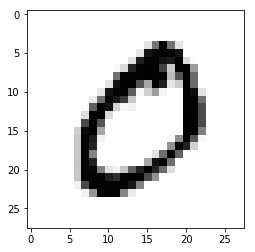

In [54]:
all_values= data_list[1].split(',')
img_array= np.asfarray(all_values[1:]).reshape((28,28))
print(img_array.shape)
plot.imshow(img_array, cmap='Greys')

In [56]:
# scaled input和非scaled效果是一样哒
scaled_input= (np.asfarray(all_values[1:])/255*0.99)+0.01
print(scaled_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

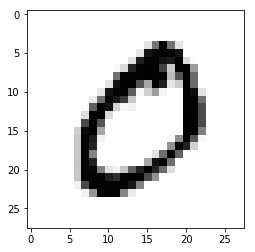

In [59]:
#scaled_input.reshape(28,28)
plot.imshow(scaled_input.reshape(28,28), cmap="Greys")

In [71]:
input_nodes=784
hidden_nodes=100
output_nodes=10

learning_rate=0.3
n= neuralNetwork(input_nodes, hidden_nodes, output_nodes,learning_rate)

In [72]:
for record in date_list:
    all_values= record.split(',')
    inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
    targets=np.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)

In [73]:
with open('mnist_test_10.csv') as f:
    test_data= f.readlines()

In [74]:
all_values= test_data[0].split(',')
print(all_values[0])

7


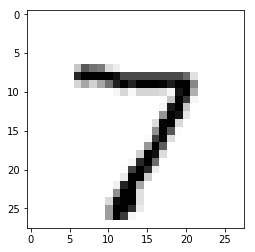

In [75]:
img_array= np.asfarray(all_values[1:]).reshape(28,28)
plot.imshow(img_array, cmap="Greys")

In [77]:
n.query(np.asfarray(all_values[1:]))

array([[ 0.01956649],
       [ 0.01418903],
       [ 0.10708489],
       [ 0.09304496],
       [ 0.05500892],
       [ 0.01714134],
       [ 0.00258944],
       [ 0.64980971],
       [ 0.10843634],
       [ 0.03501819]])